# Exploratory Data Analysis of Steam Reviews
As we've explored the data we have available in the Steam review dataset, we have increased our understanding of the available information and have updated our research questions accordingly:
 - Is there any correlation between receiving a game for free and the positivity of review?
 - How does word choice affect the number of comments on a review?
 - How does the length of review correlate to the score the Steam algorithm gave it and the number of upvotes?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts import project_functions

data = project_functions.load_and_process('..\data\data_raw\*.csv')

## Comparing reviewers who paid vs. received the game for free
Ryan

## Comparing word choice to number of review comments
Maysey

## Comparing review length to Steam algorithm score and upvotes
One interesting aspect of this dataset is the inclusion of Steam's algorithm score, used to determine the visibility priority of the review in Steam's review pages. We wanted to explore how the length of a review correlates to scoring in Steam's algorithm, and constrast that complex calculated score to a simple count of upvotes.

The below plots compare the Steam Algorithm Score to the Review Length:

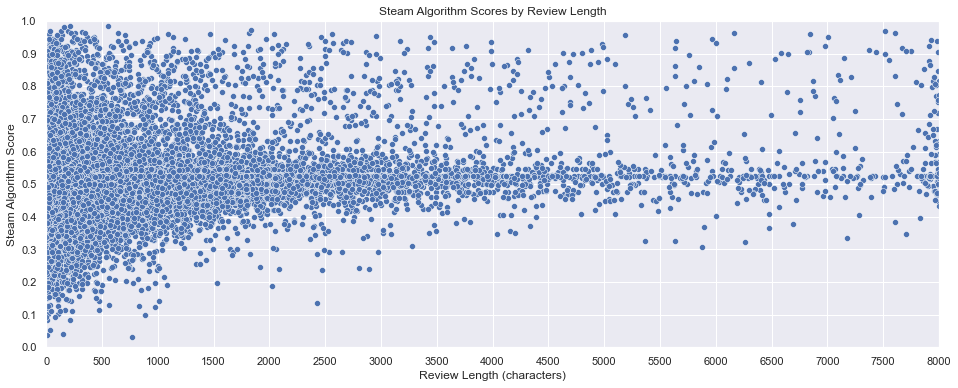

In [210]:
# clear out meaningless algorithm scores (with a value of 0)
sample = data[data.steam_algorithm_score != '0']
sns.set(rc={'figure.figsize':(16,6)})

review_lengths = sample['review'].apply(lambda x: len(str(x)))
algorithm_scores = sample['steam_algorithm_score'].apply(lambda x: float(x))

ax = sns.scatterplot(x=review_lengths, y=algorithm_scores)
ax.set(xlabel='Review Length (characters)', ylabel='Steam Algorithm Score', title='Steam Algorithm Scores by Review Length')
plt.xlim(0, 8000)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 8001, 500))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

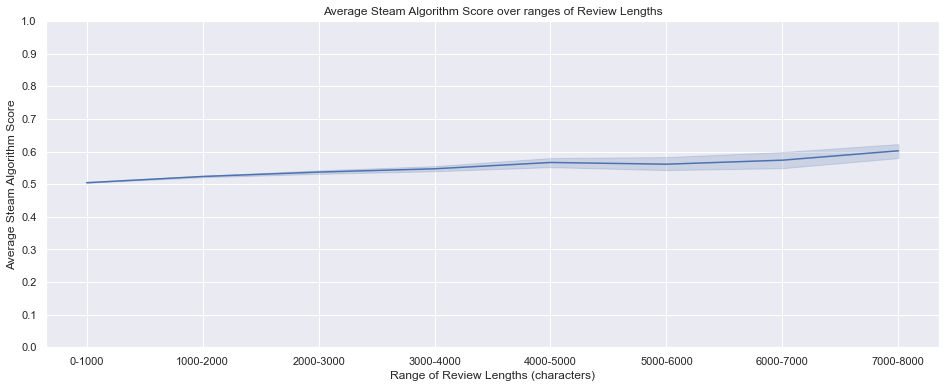

In [212]:
# clear out meaningless algorithm scores (with a value of 0)
sample = data[data['steam_algorithm_score'] != '0'][['review','steam_algorithm_score']]
sample['review_length'] = sample['review'].apply(lambda x: len(str(x)))
sample['steam_algorithm_score'] = sample['steam_algorithm_score'].apply(lambda x: float(x))
sample = sample.drop(columns='review')

sample['review_length_bins'] = pd.cut(sample['review_length'], bins=np.arange(0, 8001, 1000), labels=np.arange(0, 8000, 1000))
sample['review_length_bins'] = sample['review_length_bins'].apply(lambda x: str(x) + '-' + str(int(x) + 1000))

ax = sns.lineplot(x='review_length_bins', y='steam_algorithm_score', data=sample)
ax.set(xlabel='Range of Review Lengths (characters)', ylabel='Average Steam Algorithm Score', title='Average Steam Algorithm Score over ranges of Review Lengths')
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

While there's a LOT of data here, some things are visually apparent. For one, you may have noticed a *slight* trend toward middle values for the algorithm score - this is a trend we observed in exploratory analysis of this dataset as well. It seems that, for the majority of reviews, no matter what length you make it, chances are it'll score an average value.

This isn't surprising. Steam's algorithm computes a score based on many factors, and the vast majority of reviews receive almost no attention to fuel this computation, as shown in the below graph:

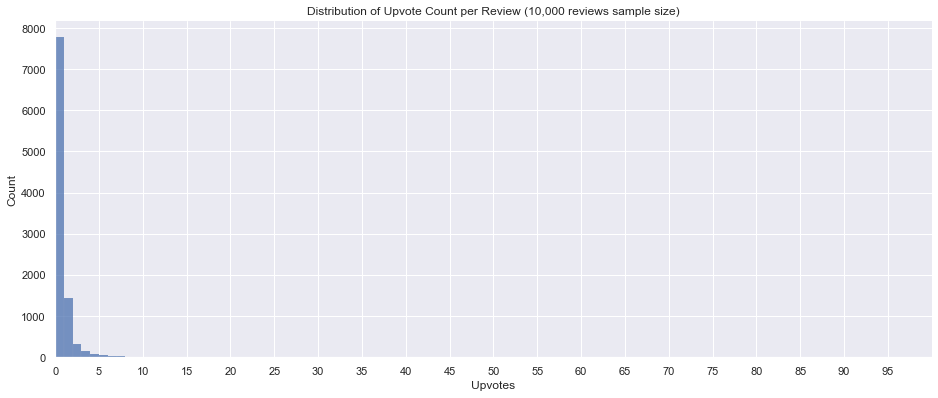

In [83]:
upvotes = data['votes_up'].astype(int).sample(10000).sort_values()

ax = sns.displot(upvotes, binwidth=1, height=5.5, aspect=2.4)
ax.set(xlabel='Upvotes', ylabel='Count', title='Distribution of Upvote Count per Review (10,000 reviews sample size)')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.show()

*As we can see, most reviews don't receive a single upvote. So, we should expect that the majority of algorithm scores are placed firmly around the middle mark, given the lack of data available to evaluate them.*

But let's take another look at the distribution. We know that shorter reviews are significantly more common (in fact, we found that the 10 most common reviews are all under 10 characters long!), and we can see the results of this in the first graph, with the plot density decreasing substantially as we look to the right.

Interestingly, despite the infrequency of long reviews, we see a consistent sprinkling of highly-scored reviews throughout the entire graph. In contrast, scores below 0.3 are virtually unheard of past the 3000 character mark. **This means that longer reviews have a proportionately much higher chance of being well-rated by Steam's algorithm compared to short ones.** This conclusion is further backed by the second graph, which shows the average score over ranges of review lengths. As we can see, the average score increases by a whopping 0.1 based on review length alone.

This correlation is most likely due largely in part to the quality of longer reviews on average. The longest reviews are typically in-depth analyses or curated reviews, which generally receive much more attention than the average review, and therefore a higher algorithm score.